In [162]:
conda install scikit-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\luan.jesus\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.2                |           py37_0         2.8 MB
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following packages will be UPDATED:

  conda                                       4.7.12-py37_0 --> 4.8.2-py37_0




conda-4.8.2          | 2.8 MB    |            |   0% 
conda-4.8.2          | 2.8 MB    | #2         |  13% 
conda-4.8.2          | 2.8 MB    | #####2     |  52% 
conda-4.8.2          | 2.8 MB    | ########9  |  89% 
conda-4.8.2          | 2.8 MB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... don

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('dados_vendas.csv', sep=";")

#Converte o tipo das colunas janeiro/2017 pra frente para inteiro 
for i in range(8, len(data.columns)):
    column = data.columns[i]
    data[column] = data[column].astype('int64')

In [61]:
display(data.head())
display(data.describe())

,ID,Identificador,Descrição,Grupo nível 01,Grupo nível 02,Grupo nível 03,Grupo nível 04,Grupo nível 05,Janeiro/2017,Fevereiro/2017,...,Abril/2019,Maio/2019,Junho/2019,Julho/2019,Agosto/2019,Setembro/2019,Outubro/2019,Novembro/2019,Dezembro/2019,Total
0,68,44,VERIFICAÇÃO INICIAL DS44,NaN,NaN,NaN,NaN,NaN,0,0,...,0,1008,2016,1008,1245,0,992,0,0,6269
1,76,49,VERIFICAÇÃO INICIAL REPROVADO,NaN,NaN,NaN,NaN,NaN,0,0,...,866,0,0,1296,13,0,10,0,0,3719
2,5996,AD3018,APARELHO DIGITAL 3018 PULSO,BIC,PRODUTO ACABADO,NaN,NaN,NaN,6,31,...,0,0,0,0,0,0,0,0,0,157
3,5997,AD3132,APARELHO DIGITAL 3132 BRACO,BIC,PRODUTO ACABADO,NaN,NaN,NaN,1,382,...,0,0,0,0,0,0,0,0,0,403
4,6078,ANPA0101Q,ANGULO PA COM MOLA E OLIVAS PVC,PAMED,PRODUTO ACABADO,ACESSORIO,NaN,NaN,32,10,...,59,30,57,15,10,50,40,25,2,1206


,ID,Janeiro/2017,Fevereiro/2017,Março/2017,Abril/2017,Maio/2017,Junho/2017,Julho/2017,Agosto/2017,Setembro/2017,...,Abril/2019,Maio/2019,Junho/2019,Julho/2019,Agosto/2019,Setembro/2019,Outubro/2019,Novembro/2019,Dezembro/2019,Total
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,...,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,10173.929803,12.312808,27.862069,30.364532,28.609606,28.508621,30.496305,24.788177,35.715517,27.722906,...,27.386700,19.753695,24.120690,22.458128,25.880542,20.289409,19.619458,18.483990,16.072660,1015.115764
std,4320.812373,51.519866,96.958866,101.185989,102.496550,98.652105,108.849725,110.823682,123.600901,89.291226,...,95.417743,74.071954,96.220066,85.033855,91.709221,82.576624,72.056932,64.866711,58.906776,3548.177738
min,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6729.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
50%,7761.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000
75%,11299.750000,1.000000,4.250000,10.000000,5.000000,6.000000,8.000000,5.000000,9.000000,9.000000,...,5.000000,3.250000,10.000000,7.000000,8.000000,3.000000,6.000000,7.000000,2.000000,393.000000
max,17883.000000,807.000000,944.000000,1091.000000,1130.000000,1197.000000,1586.000000,2319.000000,1391.000000,1098.000000,...,978.000000,1008.000000,2016.000000,1296.000000,1245.000000,1414.000000,992.000000,930.000000,770.000000,58010.000000


pandas.core.frame.DataFrame

In [6]:
# Total de vendas por produto  no perído de Janeiro/2017 a Dezembro/2019
vendas_por_produto = data[['Identificador', 'Descrição','Total']].sort_values(by=['Total'], ascending=False)
display(vendas_por_produto)

,Identificador,Descrição,Total
392,DV0223,ETIQUETA INDENTIFICACAO COR VERDE,58010
702,PA2006,AP PA AD NY F CONT PRETO PVC,36323
391,DV0218,ETIQUETA INDENTIFICACAO COR PRETA,26000
352,CJPA209,CJ AP PA AD NY F CONT PRETO EST DUOSSON PVC,25291
590,IE0703Q,PAR DE OLIVAS BIC PVC,18851
...,...,...,...
318,CJ1601,CJ AP BIC AD NY F METAL AZUL EST AD DUP AZUL L...,1
745,W21700,OTOSCOPIO CIRURGICO 35V C/ESPECULOS,1
486,ES1400,ESTETOSCOPIO RAPPAPORT PRETO,1
470,ES0735,ESTETOSCOPIO BIC DUPLO PEDIATRICO TRANSP VERMELHO,1


# Regressão Linear

In [72]:
periodos = data.drop(columns=['ID', 'Identificador', 'Descrição', 'Grupo nível 01', 'Grupo nível 02',
       'Grupo nível 03', 'Grupo nível 04', 'Grupo nível 05','Total'])
d = {'Periodo':periodos.columns.to_list(), 'Total':periodos.sum().to_list()}
total_por_periodo = pd.DataFrame(d)
display(total_por_periodo)

#Total de vendas por mês

,Periodo,Total
0,Janeiro/2017,9998
1,Fevereiro/2017,22624
2,Março/2017,24656
3,Abril/2017,23231
4,Maio/2017,23149
5,Junho/2017,24763
6,Julho/2017,20128
7,Agosto/2017,29001
8,Setembro/2017,22511
9,Outubro/2017,21404


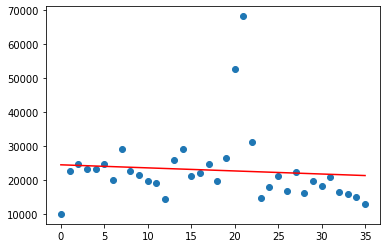

In [73]:
for i in range(36):
    X[i] = i
Y = total_por_periodo.iloc[:, 1].values.reshape(-1, 1) # Lista de Valores

lr = LinearRegression()
lr.fit(X, Y)

Y_pred = lr.predict(X)

# Visualisar resultados
plt.scatter(X, Y) # Desenha os pontos no gráfico
plt.plot(X, Y_pred, color='red') # A linha vermelha
plt.show()